<a href="https://colab.research.google.com/github/Atruk/Hackathon_Innopolis/blob/main/new_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
from tensorflow.keras.models import Model, Sequential, load_model 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer 
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam, Adamax, Adadelta 
from tensorflow.keras import utils 
from google.colab import files 
import matplotlib.pyplot as plt 
from gensim.models import word2vec 
import os 
import pandas as pd 
import time 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from collections import Counter
# from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.impute import SimpleImputer
import os
import time
from functools import wraps

In [ ]:
get_y_train = '/content/drive/MyDrive/Hackathon_Innopolis/train.csv'
get_x_train = '/content/drive/MyDrive/Hackathon_Innopolis/new_train_dataset.csv'

In [ ]:
y_train = pd.read_csv(get_y_train, usecols=['Active'])

In [ ]:
y_train["Active"] = y_train["Active"].astype("int64")
y_train.shape

(5557, 1)

In [ ]:
x_train = pd.read_csv(get_x_train)

In [ ]:
df = pd.read_csv(get_x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Columns: 104 entries, tpsa to 99
dtypes: float64(102), int64(2)
memory usage: 4.4 MB


In [ ]:
print(x_train.shape)
print(y_train.shape)

(5557, 104)
(4445, 1)


In [ ]:
# y = y_train['Active'].values
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    test_size=.20, shuffle=True, # .20, 0.30, 0.1
                                                    stratify=y_train, random_state=123) # 123, 42

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4445, 104)
(4445, 1)
(1112, 104)
(1112, 1)


# Model_v1

In [ ]:
# weights = '/content/drive/MyDrive/Hackathon_Innopolis/model_weights_v2.h5'
model = '/content/drive/MyDrive/Hackathon_Innopolis/model_v2.h5'
model = load_model(model)

In [ ]:
def createModel():
  model = Sequential()
  model.add(Dense(256, input_dim = X_train.shape[1], activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(164, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(164, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # model.load_weights('model.h5')
  model.compile(loss="binary_crossentropy", optimizer=Adam(0.001))
  return model

In [ ]:
model = createModel()

In [ ]:
train = model.fit(X_train, y_train, batch_size = 128, epochs = 200)

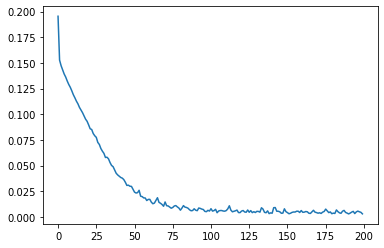

In [ ]:
plt.plot(train.history['loss'], label='loss')
plt.show()

In [ ]:
pred = (model.predict(X_test) > 0.5).astype("int")
values, counts = np.unique(pred, return_counts=True)
print(values, counts)
f1_score(y_test, pred, average='binary')

[0 1] [1087   25]


0.3636363636363636

In [ ]:
model.save_weights('model_weights_v2.h5')
model.save('model_v2.h5')

# Predict Test data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Hackathon_Innopolis/test.csv', usecols=['Smiles'])
new_test_dataset = pd.read_csv('/content/drive/MyDrive/Hackathon_Innopolis/new_test_dataset.csv')

In [ ]:
# to_csv Submission.csv
X_test_dataset = StandardScaler().fit_transform(new_test_dataset)
test_prediction = (model.predict(X_test_dataset) > 0.5).astype("int")
print(test_prediction)

values, counts = np.unique(test_prediction, return_counts=True)
print(values, counts)

# df_sub = pd.read_csv('/content/drive/MyDrive/Hackathon_Innopolis/test.csv', usecols=['Smiles'])
df_test['Active'] = test_prediction
print(df_test['Active'].value_counts())

df_test.to_csv('submission.csv', index=False)
df = pd.read_csv('/content/submission.csv')
print(df['Active'].value_counts())

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]
[0 1] [1593   21]
0    1593
1      21
Name: Active, dtype: int64
0    1593
1      21
Name: Active, dtype: int64
